In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-03-04 05:51:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.0MB/s    in 5.7s    

2025-03-04 05:51:10 (18.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"{len(dirnames)} directories and {len(filenames)} files in {dirpath}")

2 directories and 0 files in pizza_steak
2 directories and 0 files in pizza_steak/train
0 directories and 750 files in pizza_steak/train/steak
0 directories and 750 files in pizza_steak/train/pizza
2 directories and 0 files in pizza_steak/test
0 directories and 250 files in pizza_steak/test/steak
0 directories and 250 files in pizza_steak/test/pizza


In [4]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class+str(img.shape))
  plt.axis("off")
  return img

['228778.jpg']


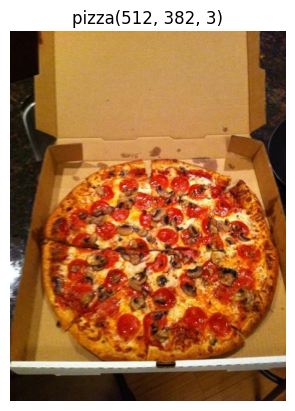

In [6]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")


In [7]:
import tensorflow as tf

img = tf.constant(img)
img

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[16,  6,  5],
        [15,  5,  4],
        [14,  4,  3],
        ...,
        [22, 16, 20],
        [23, 17, 21],
        [23, 17, 21]],

       [[17,  7,  6],
        [16,  6,  5],
        [15,  5,  4],
        ...,
        [22, 16, 20],
        [21, 15, 19],
        [20, 14, 18]],

       [[15,  5,  4],
        [14,  4,  3],
        [14,  4,  3],
        ...,
        [28, 19, 24],
        [23, 17, 19],
        [21, 15, 17]],

       ...,

       [[16, 11,  8],
        [15, 10,  7],
        [15,  7,  5],
        ...,
        [86, 40, 17],
        [81, 34, 14],
        [79, 32, 12]],

       [[15, 10,  7],
        [14,  9,  6],
        [15,  7,  5],
        ...,
        [76, 33, 14],
        [77, 32, 13],
        [77, 32, 13]],

       [[14,  9,  6],
        [13,  8,  5],
        [14,  6,  4],
        ...,
        [71, 30, 10],
        [78, 35, 18],
        [83, 40, 23]]], dtype=uint8)>

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,input_shape=(224,224,3),activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 225ms/step - accuracy: 0.6123 - loss: 0.6363 - val_accuracy: 0.8040 - val_loss: 0.4428
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.7903 - loss: 0.4533 - val_accuracy: 0.8540 - val_loss: 0.3618
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.8224 - loss: 0.4016 - val_accuracy: 0.8640 - val_loss: 0.3237
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.8409 - loss: 0.3565 - val_accuracy: 0.8080 - val_loss: 0.4126
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8592 - loss: 0.3477 - val_accuracy: 0.8380 - val_loss: 0.3539


In [10]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [11]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"])

history_2 = model_2.fit(train_data,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.5142 - loss: 1.6061 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.5042 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.4899 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.5157 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [12]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"])

history_3 = model_3.fit(train_data,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.5618 - loss: 8.1871 - val_accuracy: 0.7680 - val_loss: 0.7280
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.6904 - loss: 1.0407 - val_accuracy: 0.6480 - val_loss: 1.0966
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.7234 - loss: 0.7976 - val_accuracy: 0.5840 - val_loss: 1.6195
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.7230 - loss: 1.0059 - val_accuracy: 0.6360 - val_loss: 0.7589
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.7325 - loss: 0.6998 - val_accuracy: 0.7800 - val_loss: 0.4584


In [13]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,input_shape=(224,224,3),activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"])

history_4 = model_4.fit(train_data,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - accuracy: 0.6053 - loss: 1.2306 - val_accuracy: 0.6780 - val_loss: 0.5474
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.7688 - loss: 0.4944 - val_accuracy: 0.7500 - val_loss: 0.5095
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8625 - loss: 0.3760 - val_accuracy: 0.8360 - val_loss: 0.3793
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.9073 - loss: 0.2501 - val_accuracy: 0.8000 - val_loss: 0.4415
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.9697 - loss: 0.1344 - val_accuracy: 0.8320 - val_loss: 0.4002


<Axes: >

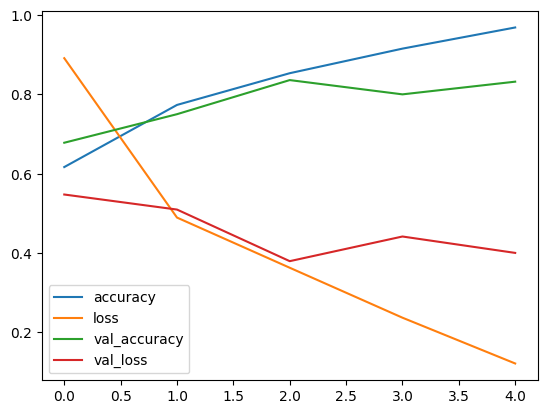

In [14]:
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [33]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras import Sequential

model_5 = Sequential([
     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
     MaxPool2D(),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation="sigmoid")
 ])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"])

history_5 = model_5.fit(train_data,epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.6476 - loss: 0.6587 - val_accuracy: 0.7720 - val_loss: 0.4679
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.7878 - loss: 0.4494 - val_accuracy: 0.7740 - val_loss: 0.4581
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.8139 - loss: 0.4495 - val_accuracy: 0.8040 - val_loss: 0.4236
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8263 - loss: 0.4097 - val_accuracy: 0.8460 - val_loss: 0.3549
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8354 - loss: 0.3920 - val_accuracy: 0.8620 - val_loss: 0.3204
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8600 - loss: 0.3353 - val_accuracy: 0.8420 - val_loss: 0.3277
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8711 - loss: 0.3118 - val_accuracy: 0.8580 - val_loss: 0.3061
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.8980 - loss: 0.2584 - val_accuracy: 0

<Axes: >

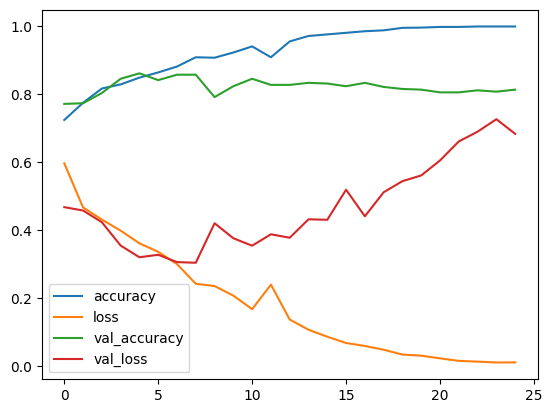

In [34]:
import pandas as pd
pd.DataFrame(history_5.history).plot()

In [35]:
model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8312 - loss: 0.6206


[0.683906078338623, 0.8140000104904175]

In [32]:
model_5.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [36]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                        shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True)

test_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True)

In [43]:
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=True)

Found 1500 images belonging to 2 classes.


In [44]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"])

history_6 = model_6.fit(train_data_aug,epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 424ms/step - accuracy: 0.5483 - loss: 0.7025 - val_accuracy: 0.7160 - val_loss: 0.6036
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 404ms/step - accuracy: 0.6732 - loss: 0.6048 - val_accuracy: 0.8260 - val_loss: 0.4162
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step - accuracy: 0.7322 - loss: 0.5366 - val_accuracy: 0.8280 - val_loss: 0.3967
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 422ms/step - accuracy: 0.7721 - loss: 0.4923 - val_accuracy: 0.8200 - val_loss: 0.3873
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 400ms/step - accuracy: 0.7708 - loss: 0.4805 - val_accuracy: 0.7940 - val_loss: 0.4575


<Axes: >

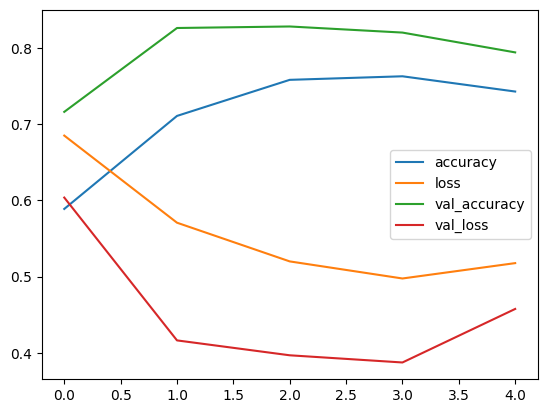

In [45]:
import pandas as pd
pd.DataFrame(history_6.history).plot()